<a href="https://colab.research.google.com/github/padfoot194/Pytorch_Learning/blob/main/A_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Create a model class that inherits nn.Module

class Model(nn.Module):
  #Input Layer (4features of flower)--> Hidden Layer1(number of neuron)-->
  #H2(n)-->output(3 classes of iris flower)
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1= nn.Linear(in_features,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out= nn.Linear(h2,out_features)
    #fc stands for fully connected layers
  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)
    return x
    #relu= rectified linear unit
    #self.fc1: a fully connected layer mapping the 4-dimensional input to an 8-dimensional hidden representation.
    #self.fc2: a fully connected layer mapping from that 8-dimensional space to a 9-dimensional space.
    #self.out: a fully connected layer mapping from 9 dimensions to the 3 output classes.
    #Why self is used: By attaching these layers to self,
    #you register them as part of the module. PyTorch will then know to include their parameters in model.parameters(), move them with .to(device), etc.

In [ ]:
#Pick a manual seed for randomization.
torch.manual_seed(33)
#create an instance of model.
model= Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df= pd.read_csv(url)
#df= dataframe

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#Change last column from string to integer
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

<ipython-input-63-a8b21482c7e6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train-Test-Split!! Set X,Y
X= my_df.drop('variety',axis=1)
y= my_df['variety']

#Here x is the features and y is the variety of flower and their format as df

In [ ]:
#Convert dataframe to numpy array
X= X.values
y= y.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=33)

In [ ]:
# Convert X features to float tensors
X_train= torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)

In [ ]:
#Convert y labels to tensors long
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [ ]:
# Set criterion of the model to measure the error,how far are predictions from real value
criterion= nn.CrossEntropyLoss()
#Choose Adam optimizer, learning rate= lr(if error doesn't go down after a bunch of iterations(epochs), lower our lr)
optimizer= torch.optim.Adam(model.parameters(),lr= 0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# Train our model!
# Epochs?? One run through all the training data in our network.
epochs= 100
losses=[]
for i in range (epochs):
  #go forward and make a prediction
  y_pred= model.forward(X_train) #get predicted result

  #measure the loss/error- gonna be high at first
  loss= criterion(y_pred,y_train) #predicted values vs train values

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i% 10 ==0:
    print(f'Epoch:{i} and loss:{loss}')

  #Do some back propagation
  #take the error rate to forward propagation and feed it back through the
  #network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:1.1883491277694702
Epoch:10 and loss:1.0544763803482056
Epoch:20 and loss:0.9277334809303284
Epoch:30 and loss:0.6553775072097778
Epoch:40 and loss:0.4491281509399414
Epoch:50 and loss:0.32801052927970886
Epoch:60 and loss:0.21286557614803314
Epoch:70 and loss:0.12871959805488586
Epoch:80 and loss:0.08927381783723831
Epoch:90 and loss:0.07292722910642624


Text(0.5, 0, 'Epoch')

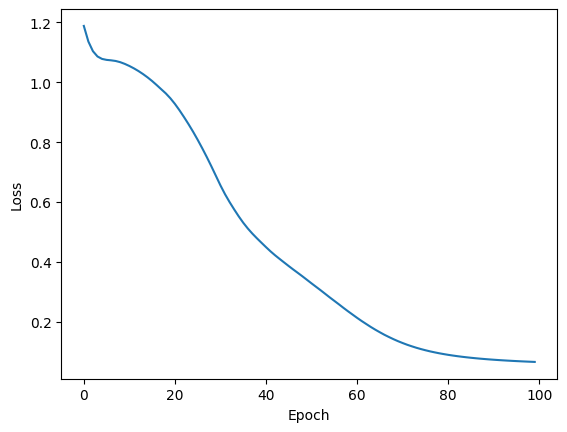

In [ ]:
#Graph the loss
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate model on test dataset (Validate model on test set)
with torch.no_grad():             #basically turns of back propagation
  y_eval= model.forward(X_test)   #X_test are features from our testset,y_eval will be predictions
  loss= criterion(y_eval,y_test)  #Find the loss or error


In [ ]:
loss

tensor(0.0690)

In [ ]:
#Here loss is 0.1315 whereas the loss from training is 0.07. It's a
#huge mismatch. We want or loss to become close to training loss.
#0.1315 is got when random seed is used 41

In [ ]:
correct= 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val= model.forward(data)

    if y_test[i]==0:
      x='Setosa'
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='Virginica'

    #will tell what type of flower class the nn think it is.
    print(f'{i+1}, {str(y_val)}  \t{x}')

    #correct or not?
    if y_val.argmax().item()== y_test[i]:
      correct+=1

print(f'we got {correct} correct')

1, tensor([-2.0833,  4.3040, -1.1920])  	Versicolor
2, tensor([-1.8174,  4.8945, -1.8306])  	Versicolor
3, tensor([ 10.8852,   5.3299, -12.3695])  	Setosa
4, tensor([-3.5197,  3.8623,  0.7052])  	Versicolor
5, tensor([-6.2240,  2.1793,  4.8524])  	Virginica
6, tensor([-9.6163,  0.8997,  9.5029])  	Virginica
7, tensor([ 10.9914,   5.4985, -12.5411])  	Setosa
8, tensor([ 11.7146,   5.6429, -13.2824])  	Setosa
9, tensor([-6.2416,  2.5901,  4.5499])  	Virginica
10, tensor([-8.0320,  1.9350,  7.0145])  	Virginica
11, tensor([-8.5758,  1.6111,  7.8348])  	Virginica
12, tensor([ 10.5935,   5.0822, -12.0076])  	Setosa
13, tensor([-8.0853,  1.7499,  7.2053])  	Virginica
14, tensor([-3.4327,  3.7908,  0.6346])  	Versicolor
15, tensor([-6.7696,  2.5198,  5.2586])  	Virginica
16, tensor([-1.8641,  4.6806, -1.6649])  	Versicolor
17, tensor([-4.9614,  3.0011,  2.9131])  	Virginica
18, tensor([ 11.9047,   5.7026, -13.4880])  	Setosa
19, tensor([-3.2359,  4.2159,  0.0722])  	Versicolor
20, tensor([-6.

In [ ]:
new_iris= torch.tensor([4.7,3.2,1.3,0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.1833,   5.3202, -12.6613])


In [ ]:
newer_iris= torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.7488,  2.5525,  4.0846])


In [ ]:
#Save our NN model.
torch.save(model.state_dict(), 'iris_model_with_pytorch.pt')

In [ ]:
#Load saved model
new_model= Model()
new_model.load_state_dict(torch.load('iris_model_with_pytorch.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)